<a href="https://colab.research.google.com/github/priyakter/Project/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv('/content/data_sets.csv')

In [4]:
print(data.shape)

(1000, 26)


In [5]:
print(data.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [6]:
print(data.head(5))

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [7]:
data=data.drop(['index','Patient Id'], axis = 1)

In [8]:
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [9]:
data['Level']=data['Level'].map({'Low':0, 'Medium':1, 'High':2})

In [10]:
target=data['Level']
print(pd.value_counts(target))

Level
2    365
1    332
0    303
Name: count, dtype: int64


<ipython-input-10-89858128387f>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(target))


In [11]:
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [13]:
seed=7
train_data,test_data=train_test_split(data,test_size=0.35,random_state=7,stratify=target)
print('\n Training Data:',train_data.shape)
print('\n Testing Data:',test_data.shape)
print(pd.value_counts(train_data['Level']))
print(pd.value_counts(test_data['Level']))


 Training Data: (650, 24)

 Testing Data: (350, 24)
Level
2    237
1    216
0    197
Name: count, dtype: int64
Level
2    128
1    116
0    106
Name: count, dtype: int64


<ipython-input-13-da1fb7b83079>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_data['Level']))
<ipython-input-13-da1fb7b83079>:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(test_data['Level']))


In [14]:
train_x=train_data.drop('Level',axis=1)
train_y=train_data['Level']
test_x=test_data.drop('Level',axis=1)
test_y=test_data['Level']

In [17]:
RF=RandomForestClassifier()
RF.fit(train_x,train_y)

RandomForestClassifier()

In [18]:
prediction_train=RF.predict(train_x)
prediction_test=RF.predict(test_x)
train_ac=accuracy_score(train_y,prediction_train)
test_ac=accuracy_score(test_y,prediction_test)
print('Training Accuracy:',train_ac)
print('Testing Accuracy:',test_ac)

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [20]:
DT=DecisionTreeClassifier()
DT.fit(train_x,train_y)

DecisionTreeClassifier()

In [21]:
prediction_trains=RF.predict(train_x)
prediction_tests=RF.predict(test_x)
train_acc=accuracy_score(train_y,prediction_trains)
test_acc=accuracy_score(test_y,prediction_tests)
print('Training Accuracy:',train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 1.0
Testing Accuracy: 1.0


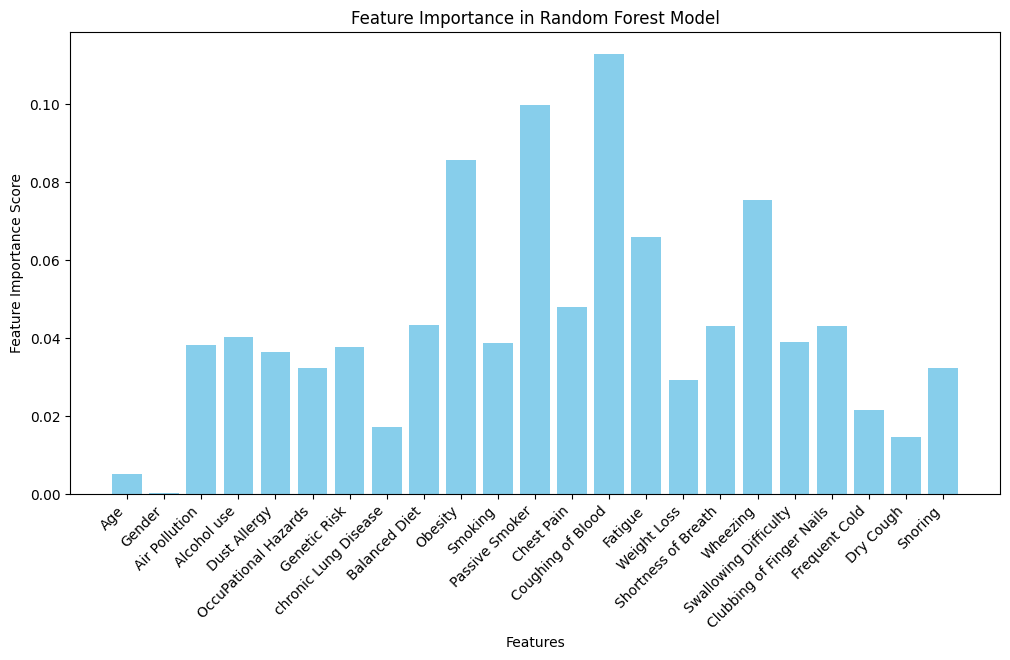

In [35]:
X = data.iloc[:, :-1]
Y= data.iloc[:, -1]

feature_importances =RF.feature_importances_
feature_names = X.columns

feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.xticks(rotation=45, ha="right")
plt.show()
